<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


#### Add your code below following the instructions given in the course


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0.5, 0, 'Median Values in $1000s')

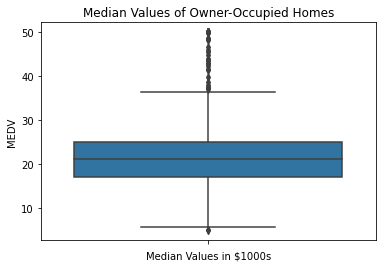

In [5]:
sns.boxplot(data=boston_df, y='MEDV')
plt.title("Median Values of Owner-Occupied Homes")
plt.xlabel("Median Values in $1000s")

Above is a boxplot showing the median values of owner-occupied homes in Boston. Which is 20K

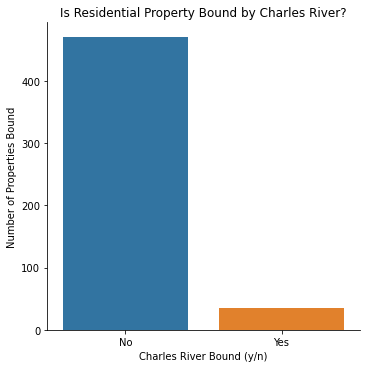

In [20]:
sns.catplot(x="CHAS", data=boston_df, kind="count")
plt.xlabel("Charles River Bound (y/n)")
plt.xticks([0,1], ["No", "Yes"])
plt.ylabel("Number of Properties Bound")
plt.title("Is Residential Property Bound by Charles River?")
plt.show()

Above is a barplot with the number of properties bound by the Charles river. Majority are not. 

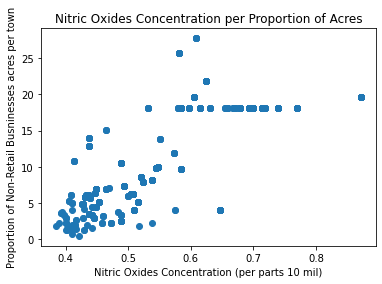

In [6]:
plt.scatter(x=boston_df.NOX, y=boston_df.INDUS)
plt.xlabel("Nitric Oxides Concentration (per parts 10 mil)")
plt.ylabel("Proportion of Non-Retail Busninesses acres per town")
plt.title("Nitric Oxides Concentration per Proportion of Acres")
plt.show()

Most homes are low in Nitric Oxide concentrations

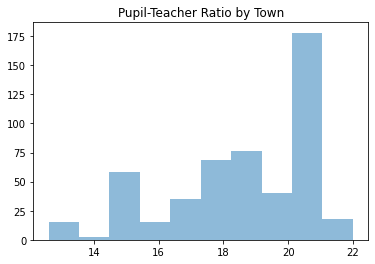

In [11]:
value = boston_df['PTRATIO']
plt.hist(value, alpha=0.5)
plt.title("Pupil-Teacher Ratio by Town")
plt.show()

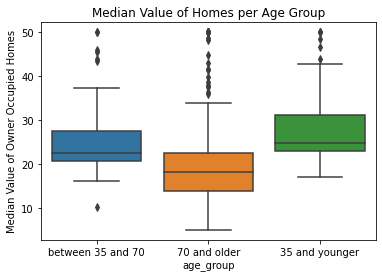

In [27]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 and older'
sns.boxplot(data=boston_df, x="age_group", y="MEDV")
plt.ylabel("Median Value of Owner Occupied Homes")
plt.title("Median Value of Homes per Age Group")
plt.show()



Above a side-by-side boxplot of the median value of homes by age group. Most homes are owned by 35 and younger group.

Hypothesis:

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [26]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['ZN'],
                   boston_df[boston_df['CHAS'] == 0]['ZN'], equal_var = True)

Ttest_indResult(statistic=-0.9594138802676184, pvalue=0.337810304785798)

Hypothesis:

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [28]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 and older'

under35 = boston_df[boston_df['age_group'] == '35 and younger']['MEDV']
btwn = boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV']
over70 = boston_df[boston_df['age_group'] == '70 and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(under35, btwn, over70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Hypothesis:

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [30]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209149, 7.913361061240043e-98)

Hypothesis:

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [33]:
import statsmodels.api as sm


X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.21e-08
Time:                        02:20:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""